# Time series - stock price prediction

In [77]:
import numpy as np 
import pandas as pd



import numpy as np and import pandas as pd is used to import two essential Python libraries, NumPy and pandas, which are widely used for numerical and data manipulation tasks.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

import warnings: Imports the warnings module, which provides a way to control the issuance of warning messages in Python.
warnings.filterwarnings('ignore'): Configures the warnings filter to ignore all warning messages. This is useful to keep the output clean, especially when you are aware of the warnings and they do not impact the execution of your code.
Imports the pyplot module from the Matplotlib library, which is used for creating static, interactive, and animated visualizations in Python.

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

get_ipython().run_line_magic('matplotlib', 'inline')

In the above  cell imports essential libraries for time series analysis and ARIMA modeling. ARIMA from statsmodels.tsa.arima_model is used for autoregressive integrated moving average models. statsmodels.api provides a range of statistical models and tests, while statsmodels.tsa.api offers tools specifically for time series analysis. statsmodels.formula.api allows for model specification using formulas. mean_squared_error from sklearn.metrics evaluates model performance by measuring prediction accuracy. The %matplotlib inline magic function ensures plots are displayed directly within Jupyter notebooks, enhancing interactive data analysis and visualization.

In [4]:
df = pd.read_csv('aapl.csv', parse_dates=['Date'])
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-30,1.234375,1.243304,1.133929,1.140625,0.763834,140372400
1,1998-12-01,1.142857,1.243304,1.129464,1.218750,0.816152,216434400
2,1998-12-02,1.218750,1.316964,1.196429,1.285714,0.860995,240620800


pd.read_csv('aapl.csv', parse_dates=['Date']): Reads the CSV file, parsing the Date column as datetime objects.
df.head(3): Outputs the first three rows of the DataFrame df.

In [5]:
print (df.describe())
print ("=============================================================")
print (df.dtypes)

              Open         High          Low        Close    Adj Close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean     48.474497    48.929859    47.989695    48.470623    42.320780   
std      55.141765    55.592274    54.685168    55.148818    53.948688   
min       0.927857     0.942143     0.908571     0.937143     0.627570   
25%       3.160714     3.276786     3.071429     3.194196     2.139034   
50%      22.700001    23.171429    22.357143    22.840000    15.295103   
75%      84.620003    85.278572    83.765717    84.618568    66.075813   
max     230.779999   233.470001   229.779999   232.070007   231.263092   

             Volume  
count  5.033000e+03  
mean   1.207779e+08  
std    9.910582e+07  
min    9.835000e+06  
25%    5.413940e+07  
50%    9.420460e+07  
75%    1.571255e+08  
max    1.855410e+09  
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               flo

In [6]:
df1 = df[['Date','Close']]
df1.head(3)


,Date,Close
0,1998-11-30,1.140625
1,1998-12-01,1.218750
2,1998-12-02,1.285714


In [7]:
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))


<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1998-11-30  1.140625
1998-12-01  1.218750
1998-12-02  1.285714
                 Close
Date                  
2018-11-26  174.619995
2018-11-27  174.240005
2018-11-28  180.940002


In this it processes a DataFrame df1 by setting the Date column as the index and sorting the DataFrame by this index. This is essential for time series analysis where date order is crucial. The code then prints the type of the resulting DataFrame, displays the first three rows, and the last three rows, allowing for a quick inspection of the time series data.



In [8]:
df_ts[df_ts.isnull()]


,Close
Date,
1998-11-30,NaN
1998-12-01,NaN
1998-12-02,NaN
1998-12-03,NaN
1998-12-04,NaN
...,...
2018-11-21,NaN
2018-11-23,NaN
2018-11-26,NaN


df_ts[df_ts.isnull()] checks for null (NaN) values in the DataFrame df_ts. However, to see which rows contain null values, 

In [9]:
len(df_ts[df_ts.isnull()])


5033

len(df_ts[df_ts.isnull()]) counts the number of rows in df_ts where any value is NaN

In [10]:
df_ts = df_ts.sort_index()
df_ts.index

DatetimeIndex(['1998-11-30', '1998-12-01', '1998-12-02', '1998-12-03',
               '1998-12-04', '1998-12-07', '1998-12-08', '1998-12-09',
               '1998-12-10', '1998-12-11',
               ...
               '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-19',
               '2018-11-20', '2018-11-21', '2018-11-23', '2018-11-26',
               '2018-11-27', '2018-11-28'],
              dtype='datetime64[ns]', name='Date', length=5033, freq=None)

In [12]:
df_ts.Close.fillna(method='pad', inplace=True)
df_ts[df_ts.Close.isnull()]
len(df_ts[df_ts.Close.isnull()])

0

<AxesSubplot:xlabel='Date'>

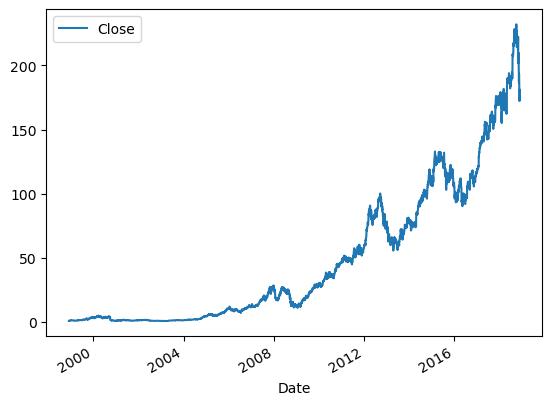

In [13]:
df_ts.plot()

 df_ts.plot() generates a plot of the time series data in the DataFrame df_ts. This visualizes the data, helping identify trends, patterns, and potential anomalies over time.



In [14]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)


The test_stationarity function evaluates the stationarity of a time series using the Dickey-Fuller test. It imports adfuller from statsmodels.tsa.stattools to perform the test, which checks if a series is non-stationary. The function prints the test results, including the test statistic, p-value, number of lags used, and observations. It also includes critical values at different confidence levels (1%, 5%, and 10%) to assess stationarity. The results help determine if the time series is stationary, essential for accurate time series modeling and forecasting.

In [15]:
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.801293
p-value                           0.991657
#lags Used                       31.000000
Number of Observations Used    5001.000000
Critical Value (1%)              -3.431658
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


In the above cell, I extract the 'Close' column from df_ts and pass it to the test_stationarity function to check its stationarity.

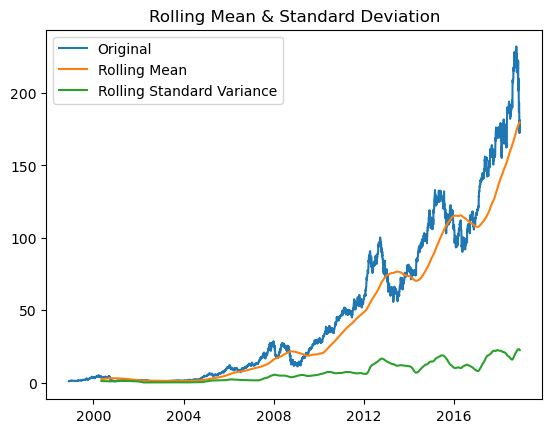

In [16]:
rolmean = ts.rolling(window=365).mean()
rolvar = ts.rolling(window=365).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

It computes and plots the rolling mean and standard deviation of the 'Close' time series over a 365-day window. It calculates the rolling mean (rolmean) and standard deviation (rolvar) to identify trends and volatility. The original series, rolling mean, and rolling variance are plotted on the same graph for comparison. The plt.legend(loc='best') function adds a legend, while plt.title('Rolling Mean & Standard Deviation') titles the plot. Finally, plt.show(block=False) displays the plot without halting code execution, providing insights into the time series' stability and patterns over time.

NameError: name 'rolstd' is not defined

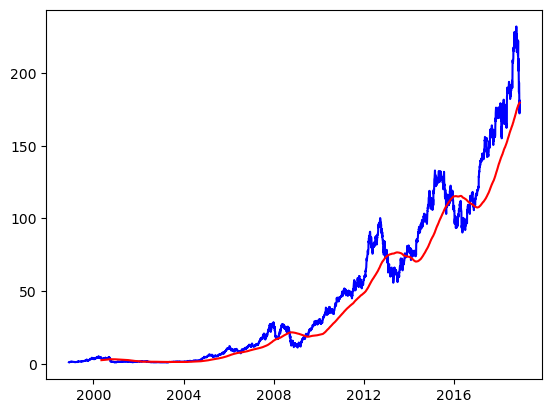

In [17]:
orig=plt.plot(ts, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='rMean')
std=plt.plot(rolstd, color='black', label='rStd')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
plt.show(block=False)


The above cell plots the original 'Close' time series in blue, the rolling mean in red, and the rolling standard deviation in black. This visualization highlights the trend and variability over a 365-day window. The plt.plot(ts, color='blue', label='Original') command plots the original data. The plt.plot(rolmean, color='red', label='rMean') command adds the rolling mean, and plt.plot(rolstd, color='black', label='rStd') plots the rolling standard deviation. The plt.legend(loc='best') function positions the legend optimally, and plt.title('Rolling Mean & STD') sets the plot title. Finally, plt.show(block=False) displays the plot without stopping code execution.

In [19]:
ts.dropna(inplace=True)
ts.head(5)
from statsmodels.tsa.stattools import adfuller
print('results of dikey-fuller test:')
dftest=adfuller(ts, autolag='AIC')

results of dikey-fuller test:


In the above cell it removes missing values from the ts time series and performs the Dickey-Fuller test to check for stationarity. ts.dropna(inplace=True) deletes any rows with NaN values in ts. ts.head(5) displays the first five rows of the cleaned series. The adfuller function from statsmodels.tsa.stattools is then used to perform the Dickey-Fuller test, with the autolag='AIC' parameter automatically selecting the optimal lag length based on the Akaike Information Criterion (AIC). Finally, it prints "results of dikey-fuller test:" to indicate the test results will follow.

In [20]:
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
    
print (dfoutput)


Test Statistic             0.801293
p-value                    0.991657
#lags Used                31.000000
#observations           5001.000000
Critical value (1%)       -3.431658
Critical value (5%)       -2.862118
Critical value (10%)      -2.567078
dtype: float64


In the above cell it formats and prints the results of the Dickey-Fuller test for stationarity. It creates a pd.Series named dfoutput from the first four elements of dftest, labeling them as 'Test Statistic', 'p-value', '#lags Used', and '#observations'. Then, it iterates over the critical values in dftest[4], adding each to dfoutput with labels like 'Critical value (1%)', 'Critical value (5%)', and 'Critical value (10%)'. Finally, print(dfoutput) outputs the formatted results, showing the test statistic, p-value, number of lags used, number of observations, and critical values for evaluating the stationarity of the time series.

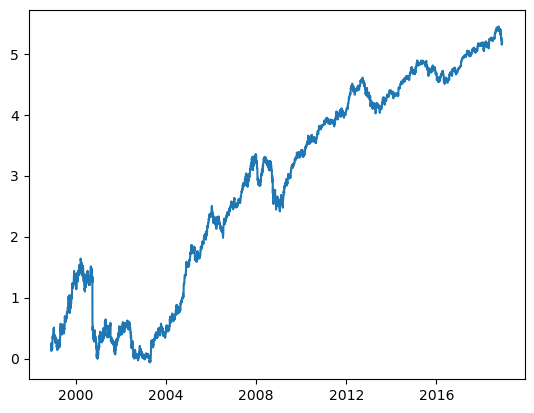

In [21]:
ts_logScale=np.log(ts)
plt.plot(ts_logScale)


In the above cell it applies a logarithmic transformation to the ts time series to stabilize its variance, a common preprocessing step in time series analysis to handle heteroscedasticity (changing variance). ts_logScale = np.log(ts) computes the natural logarithm of each value in ts, creating a new series ts_logScale. This transformation compresses the scale of large values more than small ones, making the series more uniform. plt.plot(ts_logScale) then plots the transformed series, allowing for visual inspection of trends and patterns in the stabilized data.

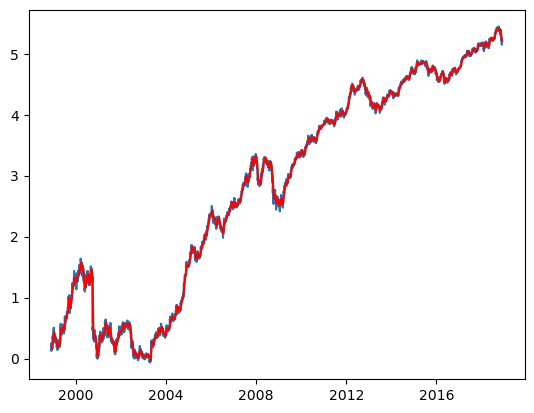

In [22]:
movingAverage=ts_logScale.rolling(window=12).mean()
movingSTD=ts_logScale.rolling(window=12).std()
plt.plot(ts_logScale)
plt.plot(movingAverage, color='red')

In the above cell it calculates the moving average and standard deviation of the log-transformed ts time series over a 12-month window and plots them. movingAverage = ts_logScale.rolling(window=12).mean() computes the rolling mean, while movingSTD = ts_logScale.rolling(window=12).std() computes the rolling standard deviation. The plt.plot(ts_logScale) plots the log-transformed series, and plt.plot(movingAverage, color='red') overlays the rolling mean in red. This visualization helps identify the underlying trend and variability in the time series, smoothing out short-term fluctuations to highlight longer-term trends.

In [23]:
ts_LogScaleMinusMA=ts_logScale-movingAverage
ts_LogScaleMinusMA.head(12)
ts_LogScaleMinusMA.dropna(inplace=True)
ts_LogScaleMinusMA.head(10)


Date
1998-12-15    0.012149
1998-12-16   -0.012704
1998-12-17    0.007861
1998-12-18    0.060776
1998-12-21    0.053884
1998-12-22    0.121948
1998-12-23    0.154775
1998-12-24    0.123691
1998-12-28    0.143859
1998-12-29    0.122058
Name: Close, dtype: float64

In the above cell it removes the trend from the log-transformed ts time series by subtracting the 12-month moving average. ts_LogScaleMinusMA = ts_logScale - movingAverage creates a detrended series ts_LogScaleMinusMA. The head(12) method displays the first 12 values, showing the effect of the transformation. ts_LogScaleMinusMA.dropna(inplace=True) removes any NaN values resulting from the subtraction, ensuring a clean series for further analysis. The head(10) method then displays the first 10 rows of the cleaned detrended series, highlighting the data ready for further stationarity testing or modeling.



In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='rMean')
    std=plt.plot(movingSTD, color='black', label='rStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & STD')
    plt.show(block=False)
    print('results of dikey-fuller test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    
    print (dfoutput)

The test_stationarity function evaluates the stationarity of a time series by plotting its rolling mean and standard deviation and performing the Dickey-Fuller test. It calculates the 12-month rolling mean and standard deviation, then plots these with the original series. The function prints the Dickey-Fuller test results, which include the test statistic, p-value, lags used, and critical values for different confidence levels. This combined visual and statistical analysis helps determine if the series is stationary, a key requirement for many time series forecasting models.

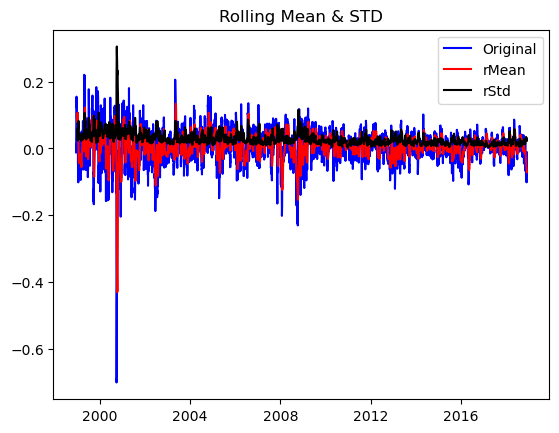

results of dikey-fuller test:
Test Statistic         -1.298667e+01
p-value                 2.868709e-24
#lags Used              2.100000e+01
#observations           5.000000e+03
Critical value (1%)    -3.431659e+00
Critical value (5%)    -2.862118e+00
Critical value (10%)   -2.567078e+00
dtype: float64


In [25]:
test_stationarity(ts_LogScaleMinusMA)


In the above cell the command test_stationarity(ts_LogScaleMinusMA) calls the previously defined test_stationarity function on the ts_LogScaleMinusMA time series.

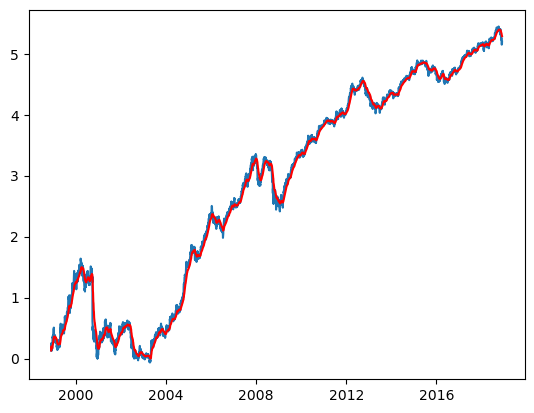

In [26]:
exponentialDecayWeightedAverage=ts_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In the above cell it calculates the exponential decay weighted average of the log-transformed time series ts_logScale and plots both the original and smoothed series. The exponential decay weighted average is computed with a half-life of 12, meaning weights decrease exponentially with time, giving more importance to recent data points. ts_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean() generates this average. plt.plot(ts_logScale) plots the original log-transformed series, and plt.plot(exponentialDecayWeightedAverage, color='red') overlays the smoothed series in red. This smoothing technique helps in emphasizing recent trends while diminishing the impact of older data points.

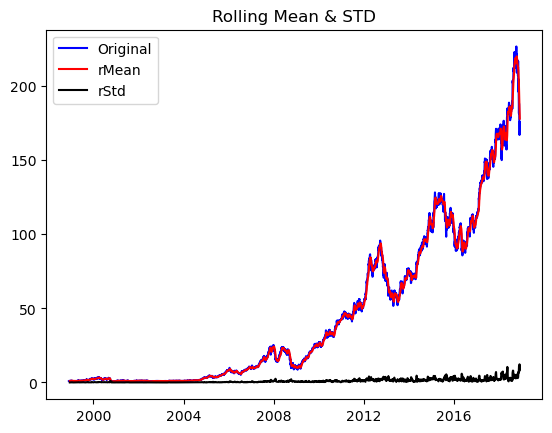

results of dikey-fuller test:
Test Statistic             0.803416
p-value                    0.991691
#lags Used                31.000000
#observations           5001.000000
Critical value (1%)       -3.431658
Critical value (5%)       -2.862118
Critical value (10%)      -2.567078
dtype: float64


In [27]:
ts_LogScaleMinusExponentialDecayAverage= ts-exponentialDecayWeightedAverage
test_stationarity(ts_LogScaleMinusExponentialDecayAverage)


In the above cell it detrends the log-transformed time series by subtracting its exponential decay weighted average, then tests the stationarity of the resulting series. ts_LogScaleMinusExponentialDecayAverage = ts_logScale - exponentialDecayWeightedAverage computes the detrended series. test_stationarity(ts_LogScaleMinusExponentialDecayAverage) then applies the test_stationarity function to this detrended series. The function calculates and plots the rolling mean and standard deviation, and performs the Dickey-Fuller test, printing the test statistic, p-value, lags used, observations, and critical values. This process checks if the detrended series is stationary, crucial for accurate time series forecasting.

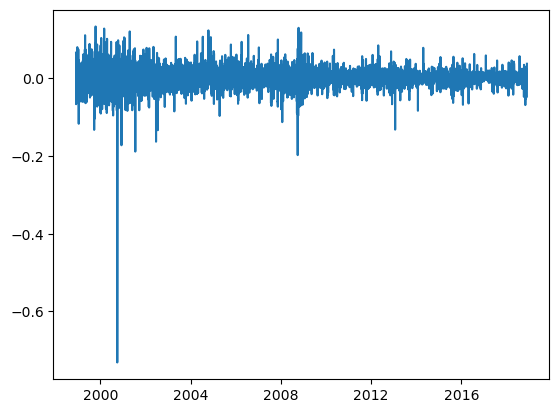

In [28]:
ts_LogDiffShifting= ts_logScale-ts_logScale.shift()
plt.plot(ts_LogDiffShifting)


In the above cell it calculates and plots the first-order difference of the log-transformed time series to remove trends and stabilize the mean. ts_LogDiffShifting = ts_logScale - ts_logScale.shift() computes the difference between consecutive log-transformed values, creating a differenced series ts_LogDiffShifting. This process highlights changes between periods, effectively removing linear trends. plt.plot(ts_LogDiffShifting) plots this differenced series, helping visualize the detrended and stabilized time series. Differencing is a common technique to achieve stationarity, a key assumption for many time series forecasting models.

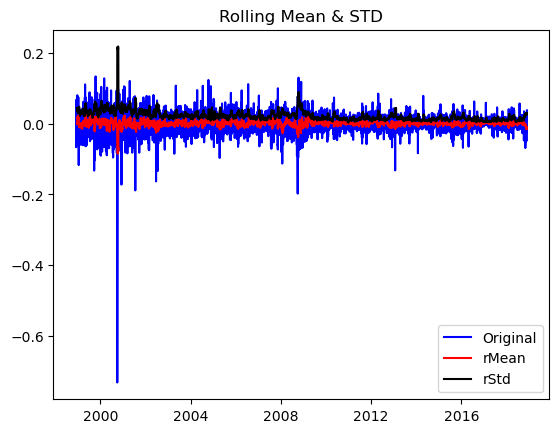

results of dikey-fuller test:
Test Statistic         -1.520099e+01
p-value                 5.830139e-28
#lags Used              2.000000e+01
#observations           5.011000e+03
Critical value (1%)    -3.431656e+00
Critical value (5%)    -2.862117e+00
Critical value (10%)   -2.567077e+00
dtype: float64


In [29]:
ts_LogDiffShifting.dropna(inplace=True)
test_stationarity(ts_LogDiffShifting)

In the above cell it removes NaN values from the first-order differenced log-transformed time series and tests its stationarity. ts_LogDiffShifting.dropna(inplace=True) eliminates NaN values created by the differencing process, ensuring a clean series. test_stationarity(ts_LogDiffShifting) then applies the test_stationarity function to this cleaned series. This function calculates and plots the rolling mean and standard deviation, then performs the Dickey-Fuller test, printing the test statistic, p-value, lags used, observations, and critical values. This analysis checks if the differenced series is stationary, a key requirement for effective time series forecasting models.

In [30]:
ts_logScale.head()

Date
1998-11-30    0.131576
1998-12-01    0.197826
1998-12-02    0.251314
1998-12-03    0.184922
1998-12-04    0.156699
Name: Close, dtype: float64

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposedLogData = seasonal_decompose(ts_logScale, model='additive', period=12)

<class 'statsmodels.tsa.seasonal.DecomposeResult'>
<class 'statsmodels.tsa.seasonal.DecomposeResult'>


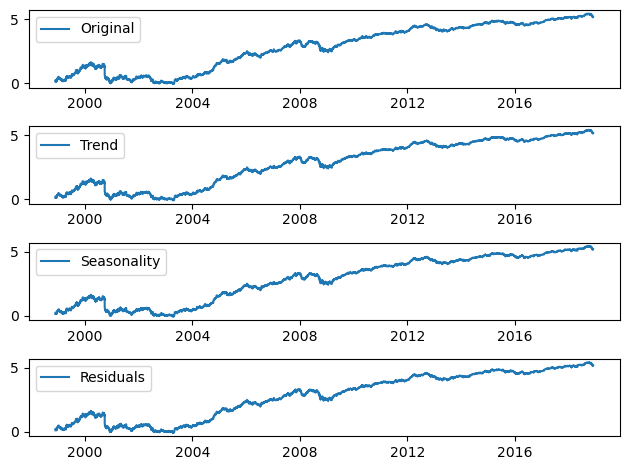

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposedLogData = seasonal_decompose(ts_logScale, model='additive', period=12)


print(type(decomposedLogData))

trend = decomposedLogData.trend
seasonal = decomposedLogData.seasonal
residual = decomposedLogData.resid
movingAverage_trend = trend.rolling(window=12).mean()
movingSTD_trend = trend.rolling(window=12).std()
movingAverage_seasonal = seasonal.rolling(window=12).mean()
movingSTD_seasonal = seasonal.rolling(window=12).std()

print(type(decomposedLogData))

plt.subplot(411)
plt.plot(ts_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In the above cell it decomposes the log-transformed time series ts_logScale into its trend, seasonal, and residual components using an additive model with a 12-period cycle. decomposedLogData = seasonal_decompose(ts_logScale, model='additive', period=12) performs the decomposition. The trend, seasonal, and residual components are extracted and stored in trend, seasonal, and residual, respectively. The moving averages and standard deviations for the trend and seasonal components are calculated over a 12-period window. The code then plots the original series, trend, seasonality, and residuals in a 4-panel subplot layout for visual analysis

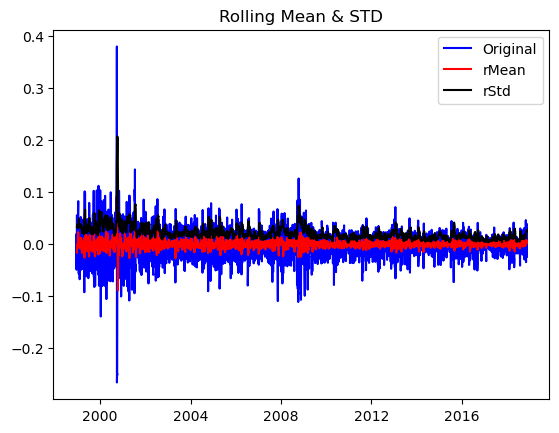

results of dikey-fuller test:
Test Statistic           -19.714246
p-value                    0.000000
#lags Used                32.000000
#observations           4988.000000
Critical value (1%)       -3.431662
Critical value (5%)       -2.862120
Critical value (10%)      -2.567079
dtype: float64


In [59]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


In the above cell it isolates the residual component of the decomposed log-transformed series for stationarity testing. decomposedLogData = residual assigns the residual component to decomposedLogData. decomposedLogData.dropna(inplace=True) removes any NaN values from the residual series, ensuring a clean dataset. test_stationarity(decomposedLogData) then applies the test_stationarity function to this cleaned residual series. The function calculates and plots the rolling mean and standard deviation, and performs the Dickey-Fuller test, printing the test statistic, p-value, lags used, observations, and critical values, to determine if the residual series is stationary, essential for validating the time series model.

In [60]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(ts_LogDiffShifting, nlags=20)
lag_pacf=pacf(ts_LogDiffShifting, nlags=20, method='ols')


In the above cell it calculates the autocorrelation function (ACF) and partial autocorrelation function (PACF) for the first-order differenced log-transformed time series ts_LogDiffShifting. lag_acf = acf(ts_LogDiffShifting, nlags=20) computes the ACF values for up to 20 lags, showing the correlation of the series with its past values. lag_pacf = pacf(ts_LogDiffShifting, nlags=20, method='ols') calculates the PACF using the ordinary least squares (OLS) method, showing the correlation of the series with its past values after removing the effects of intermediate lags. These functions help identify the order of AR and MA components for ARIMA modeling

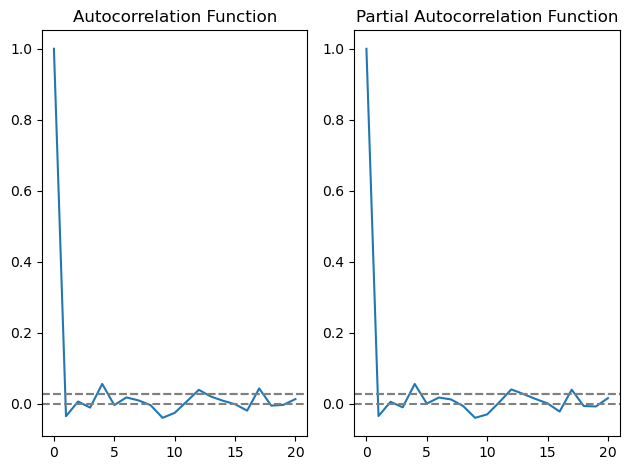

In [61]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting AR Model


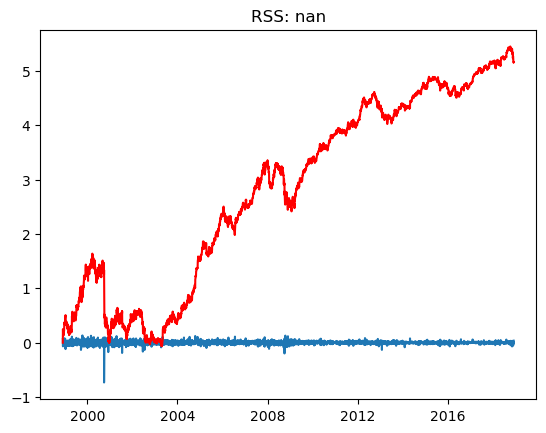

In [62]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_logScale, order=(1, 1, 1))
results_AR = model.fit() # Remove the 'disp' parameter

plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))
print('Plotting AR Model')

In the above cell it fits an ARIMA model to the log-transformed time series ts_logScale and plots the fitted values against the first-order differenced series. model = ARIMA(ts_logScale, order=(1, 1, 1)) initializes the ARIMA model with one autoregressive term, one differencing, and one moving average term. results_AR = model.fit() fits the model to the data. plt.plot(ts_LogDiffShifting) plots the differenced series, while plt.plot(results_AR.fittedvalues, color='red') overlays the model's fitted values in red. The title displays the residual sum of squares (RSS) to measure the model's fit quality. print('Plotting AR Model') confirms the plotting process.

/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

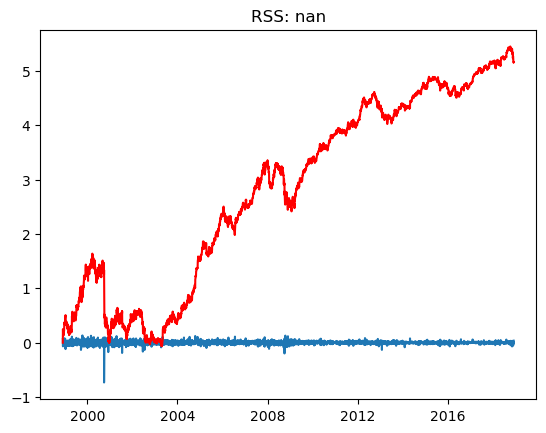

In [63]:
model = ARIMA(ts_logScale, order=(1, 1, 1))
results_ARIMA = model.fit() 
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))

In the above cell it fits an ARIMA model to the log-transformed time series ts_logScale and plots the fitted values against the first-order differenced series. model = ARIMA(ts_logScale, order=(1, 1, 1)) sets up the ARIMA model with parameters indicating one autoregressive term, one differencing, and one moving average term. results_ARIMA = model.fit() fits this model to the data. plt.plot(ts_LogDiffShifting) plots the differenced series, while plt.plot(results_ARIMA.fittedvalues, color='red') overlays the model's fitted values in red. The plot title includes the Residual Sum of Squares (RSS) value, RSS: %.4f' % sum((results_ARIMA.fittedvalues - ts_LogDiffShifting) ** 2), to measure the model's fit quality.

In [64]:
predicitons_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicitons_ARIMA_diff.head())


Date
1998-11-30    0.000000
1998-12-01    0.131576
1998-12-02    0.195632
1998-12-03    0.250178
1998-12-04    0.187419
dtype: float64


In The above cell it  creates a Series of fitted values from the ARIMA model and prints the first few entries. predicitons_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) copies the fitted values from results_ARIMA.fittedvalues into a new Series predicitons_ARIMA_diff. This Series represents the model's predicted values for the differenced log-transformed series. print(predicitons_ARIMA_diff.head()) then prints the first five values of this Series, allowing for a quick inspection of the ARIMA model's initial predictions.

In [65]:
predicitons_ARIMA_diff_cumsum=predicitons_ARIMA_diff.cumsum()
print(predicitons_ARIMA_diff_cumsum)

Date
1998-11-30        0.000000
1998-12-01        0.131576
1998-12-02        0.327208
1998-12-03        0.577386
1998-12-04        0.764805
                  ...     
2018-11-21    14191.889425
2018-11-23    14197.064022
2018-11-26    14202.214131
2018-11-27    14207.376041
2018-11-28    14212.536744
Length: 5033, dtype: float64


In the above cell it calculates the cumulative sum of the ARIMA model’s fitted values and prints the result. predicitons_ARIMA_diff_cumsum = predicitons_ARIMA_diff.cumsum() computes the cumulative sum of predicitons_ARIMA_diff, which are the ARIMA model's fitted values for the differenced series. This operation effectively reverses the differencing process, transforming the differenced series back towards the original scale (but still in the log-transformed space). print(predicitons_ARIMA_diff_cumsum) outputs the cumulative sum values, allowing for examination of how the cumulative sum evolves over time.

In [66]:
predictions_ARIMA_log = pd.Series(ts_logScale.iloc[0], index=ts_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predicitons_ARIMA_diff_cumsum, fill_value=0)


In the above cell it reconstructs the log-transformed time series from the ARIMA model’s predictions by adding the cumulative sum of differenced predictions to the initial value. predictions_ARIMA_log = pd.Series(ts_logScale.iloc[0], index=ts_logScale.index) initializes a Series predictions_ARIMA_log with the first value of ts_logScale, extending across the entire index. predictions_ARIMA_log = predictions_ARIMA_log.add(predicitons_ARIMA_diff_cumsum, fill_value=0) adds the cumulative sum of the differenced predictions (predicitons_ARIMA_diff_cumsum) to this Series, effectively transforming the differenced predictions back to the log-transformed scale, while maintaining the original index alignment.

In [67]:
predictions_ARIMA_log.head()

Date
1998-11-30    0.131576
1998-12-01    0.263153
1998-12-02    0.458784
1998-12-03    0.708962
1998-12-04    0.896382
dtype: float64

predictions_ARIMA_log.head() displays the first few entries of the reconstructed log-transformed time series, which was generated by adding the cumulative sum of ARIMA model predictions to the initial value. This provides a quick view of the initial values in predictions_ARIMA_log, allowing for inspection of the reconstruction process. It helps verify that the cumulative addition of differenced predictions aligns correctly with the original log-transformed series and that the values make sense in the context of the original data.

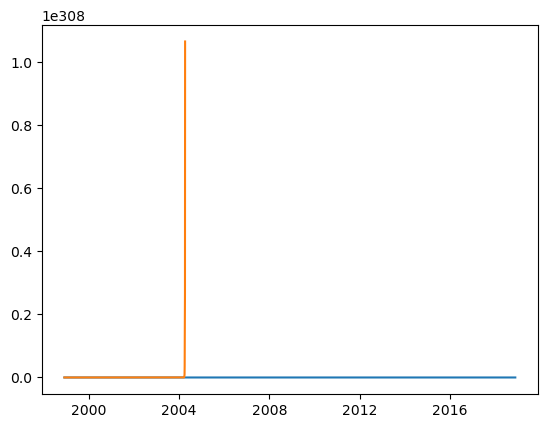

In [68]:
predicitons_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predicitons_ARIMA)


In the above cell it converts the reconstructed log-transformed series back to the original scale and plots it alongside the original time series. predicitons_ARIMA = np.exp(predictions_ARIMA_log) exponentiates predictions_ARIMA_log to reverse the logarithmic transformation, yielding predicitons_ARIMA in the original data scale. plt.plot(ts) plots the original time series ts, and plt.plot(predicitons_ARIMA) overlays the ARIMA model's predictions. This comparison visually assesses the model’s accuracy in capturing the original series' trends and values, providing insights into the model’s performance in predicting the actual data.

In [69]:
ts_logScale

Date
1998-11-30    0.131576
1998-12-01    0.197826
1998-12-02    0.251314
1998-12-03    0.184922
1998-12-04    0.156699
                ...   
2018-11-21    5.174906
2018-11-23    5.149179
2018-11-26    5.162612
2018-11-27    5.160434
2018-11-28    5.198165
Name: Close, Length: 5033, dtype: float64

ts_logScale is the natural logarithm of the original time series ts, used to stabilize variance and prepare the data for modeling.

In [75]:
results_ARIMA.forecast(30)


/Users/kiranpalla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5033    5.196853
5034    5.197266
5035    5.197136
5036    5.197177
5037    5.197164
5038    5.197168
5039    5.197167
5040    5.197167
5041    5.197167
5042    5.197167
5043    5.197167
5044    5.197167
5045    5.197167
5046    5.197167
5047    5.197167
5048    5.197167
5049    5.197167
5050    5.197167
5051    5.197167
5052    5.197167
5053    5.197167
5054    5.197167
5055    5.197167
5056    5.197167
5057    5.197167
5058    5.197167
5059    5.197167
5060    5.197167
5061    5.197167
5062    5.197167
Name: predicted_mean, dtype: float64

results_ARIMA.forecast(30) generates a forecast of the next 30 time steps using the fitted ARIMA model results_ARIMA. This function provides predictions based on the model's parameters, which have been estimated from the historical log-transformed data ts_logScale. The output typically includes the forecasted values, standard error of the forecasts, and confidence intervals, allowing for an assessment of the prediction's accuracy and uncertainty. This forecast helps in predicting future trends and values in the time series, making it useful for planning and decision-making.